Google Colab

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/chapter04.ipynb)



# Setup

 - 모듈을 임포트하고, Matplotlib 그래프를 인라인으로 표시, 그래프를 저장하기 위한 함수 준비
 - Python 3.5 이상이 설치되어 있는지 확인
 - Scikit-Learn 0.20 이상이 설치되어 있는지도 함께 확인

In [2]:
# Python 3.5 이상이 필요함
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn 0.20 이상이 필요함
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 실행할 때마다 동일한 결과를 얻기 위해 난수 시드 고정
np.random.seed(42)

# 예쁜 그래프 출력을 위한 설정
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)     # 축 라벨 크기 설정
mpl.rc('xtick', labelsize=12)    # x축 눈금 라벨 크기 설정
mpl.rc('ytick', labelsize=12)    # y축 눈금 라벨 크기 설정

# 그래프 파일을 저장할 위치 설정
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)  # 디렉토리가 없으면 생성

# 그래프를 저장하는 함수 정의
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


# Linear Regression

1장) 삶의 만족도에 대한 간단한 회귀 모델

life_satisfaction = θ₀ + θ₁ × GDP_per_capita

이 모델은 입력 특성인 GDP_per_capita에 대한 선형 함수일 뿐이며, θ₀와 θ₁은 모델의 파라미터  
선형 모델은 입력 특성들의 가중합에 편향 항(상수)를 더해 예측을 수행함

ŷ = θ₀ + θ₁x₁ + θ₂x₂ + ⋯ + θₙxₙ

 - ŷ: 예측된 값
 - n: 특성의 개수
 - xᵢ: i번째 특성 값
 - θⱼ: j번째 모델 파라미터(편향 항 θ₀와 특성 가중치 θ₁, θ₂, ⋯, θₙ 포함)

벡터 형태로 훨씬 간결하게 표현

$\hat{y} = h_{\theta}(\mathbf{x}) = \boldsymbol{\theta} \cdot \mathbf{x}$


- θ: 모델의 파라미터 벡터로, 편향 항 θ₀과 특성 가중치 θ₁부터 θₙ까지 포함
- x: 하나의 샘플에 대한 특성 벡터로, x₀부터 xₙ까지를 포함하며, x₀는 항상 1
- θ · x: 벡터 θ와 x의 내적(dot product)이며 θ₀x₀ + θ₁x₁ + θ₂x₂ + ... + θₙxₙ과 같음
-  $h_{\theta}$는 모델 파라미터 θ를 사용한 가설 함수(hypothesis function)

벡터를 종종 열 벡터(column vector)로 표현: 하나의 열을 가진 2차원 배열
θ와 x가 열 벡터라면 예측은 ŷ = θᵀx로 표현되며, θᵀ는 θ의 전치 행렬(행 벡터)
이때 θᵀx는 θᵀ와 x의 행렬 곱이며, 결과는 스칼라 값이 아닌 단일 셀을 가진 행렬로 표현됨

모델을 학습시킨다는 것 -> 모델이 훈련 세트에 가장 잘 맞도록 그 파라미터를 설정

이를 위해서는 먼저 모델이 훈련 데이터에 얼마나 잘(혹은 못) 맞는지를 측정할 수 있는 척도가 필요

2장에서 회귀 모델의 가장 일반적인 성능 측정 지표가 평균 제곱근 오차(RMSE)임을 확인함  
따라서 **선형 회귀 모델을 학습시키기 위해서는 RMSE를 최소화하는 θ 값을 찾아야 함**

실제로는 RMSE보다 MSE를 최소화하는 것이 더 간단하며 같은 결과임(어떤 함수를 최소화하는 값은 그 제곱근도 최소화하기 때문)

선형 회귀 가설 ℎ𝜃의 훈련 세트 𝑋에 대한 평균 제곱 오차(MSE)

$$
\mathrm{MSE}(\mathbf{X}, h_{\boldsymbol{\theta}}) = \frac{1}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^\top \mathbf{x}^{(i)} - y^{(i)} \right)^2
$$


표기를 단순하게 하기 위해 MSE(𝑋,ℎ𝜃) 대신 MSE(𝜃)라고 씀

## The Normal Equation

정규 방정식(Normal Equation): 비용 함수를 최소화하는 θ 값을 찾기 위해 닫힌 해(closed-form solution), 즉 결과를 직접적으로 계산해 주는 수학적 공식

$$
\hat{\boldsymbol{\theta}} = \left( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$


- $\hat{\boldsymbol{\theta}}$: 비용 함수를 최소화하는 θ 값
- y: 𝑦(1)부터 𝑦(𝑚)까지의 값을 담고 있는 타깃 값 벡터

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

 - np.random.rand(100, 1): 균등 분포에서 난수 생성, 0과 1 사이의 값, 균등 분포가 필요한 시뮬레이션이나 데이터 생성에 사용

 - np.random.randn(100, 1): 정규 분포에서 난수 생성, 평균 0, 표준편차 1인 분포를 따름, 양수와 음수 값이 모두 나옴, 정규 분포(가우시안 분포)가 필요한 모델 학습, 통계적 분석, 노이즈 추가 등에 사용

Saving figure generated_data_plot


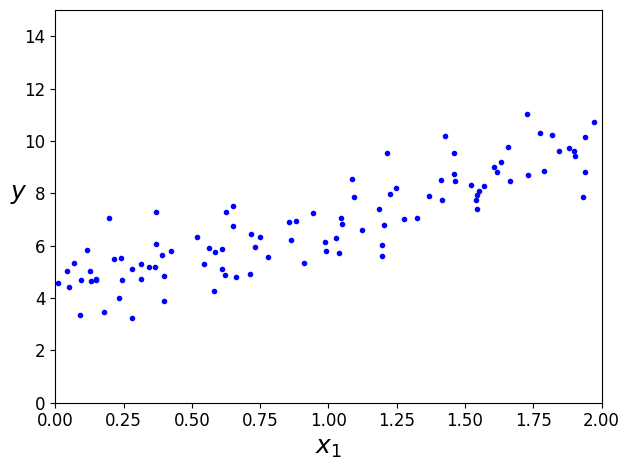

In [4]:
plt.plot(X, y, "b.") # blue(파란색), .(점)으로 표시
plt.xlabel("$x_1$", fontsize=18) # x축과 y축에 라벨 추가
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15]) # x축은 0에서 2까지, y축은 0에서 15까지 표시하도록 설정
save_fig("generated_data_plot") # 시각화된 이미지 저장
plt.show()

정규 방정식을 사용하여 $\hat{\theta}$ 계산  
산행렬의 역행렬을 계산하기 위해 NumPy의 선형 대수 모듈(np.linalg)의 `inv()` 함수 사용, 행렬 곱셈에는 `dot()` 메서드 사용

In [5]:
X_b = np.c_[np.ones((100, 1)), X] # 행렬 확장, 기존의 X 배열에 𝑥0=1을 추가하여 절편을 고려할 수 있게 함, np.c_는 두 배열을 수평으로 결합하는 함수
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) # 정규방정식

 <정규방정식>
 - X_b: 원래의 특성 행렬 X에 1을 추가하여 절편 항(θ0​)을 포함
 - X_b.T: 𝑋𝑏의 전치 행렬
 - X_b.T.dot(X_b): 특성 행렬의 전치와 특성 행렬 내적
 - np.linalg.inv(X_b.T.dot(X_b)): 역행렬
 - X_b.T.dot(y): 입력 데이터의 전치 행렬과 실제 값 𝑦를 내적
 - dot(X_b.T).dot(y): 회귀 계수 벡터 𝜃를 구함

데이터를 생성할 때 사용한 함수는 𝑦=4+3𝑥+가우시안 노이즈

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

원래 함수의 파라미터 $\theta_0 = 4$, $\theta_1 = 3$을 기대했지만, 노이즈 때문에 정확한 파라미터를 복원하는 것은 불가(결과는 근사)

이제 구한 $\hat{\theta}$를 이용해 예측을 수행

In [7]:
X_new = np.array([[0], [2]]) # X 값의 범위
X_new_b = np.c_[np.ones((2, 1)), X_new]  # np.ones는 모든 값이 1인 배열을 생성함, 절편을 고려할 수 있게 행렬 확장
y_predict = X_new_b.dot(theta_best) # 정규 방정식에서 구한 회귀 계수 theta_best를 사용해 X_new_b의 예측값을 구함
y_predict

array([[4.21509616],
       [9.75532293]])

Saving figure linear_model_predictions_plot


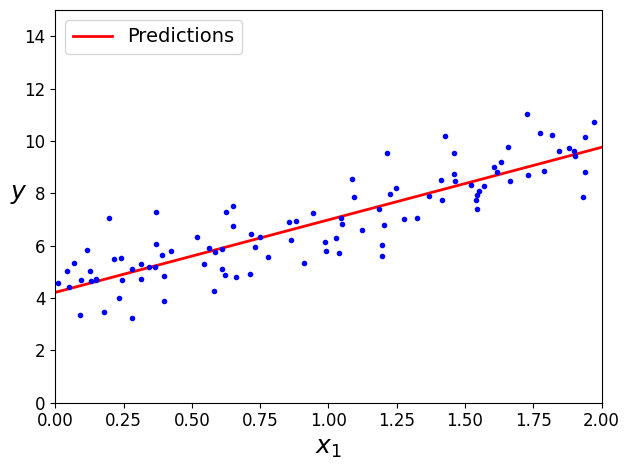

In [8]:
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions") # 빨간색 선("r-")으로 예측값 시각화
plt.plot(X, y, "b.") # 원래의 데이터 점들을 파란색 점("b.")으로 시각화
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14) # 범례 추가
plt.axis([0, 2, 0, 15])
save_fig("linear_model_predictions_plot")
plt.show()

Scikit-Learn을 사용한 선형 회귀 수행

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [10]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

LinearRegression 클래스는 `scipy.linalg.lstsq()` 함수(최소 제곱)를 기반으로 하며, 이 함수를 직접 호출할 수도 있음

In [11]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

함수는 $\hat{\theta}$=$\mathbf{X}^+$y를 계산하며, 여기서 $\mathbf{X}^+$는 𝑋의 의사역행렬(무어-펜로즈 역행렬)  
의사역행렬을 직접 계산하려면 `np.linalg.pinv()`

In [12]:
np.linalg.pinv(X_b).dot(y)

array([[4.21509616],
       [2.77011339]])

의사역행렬은 SVD(Singular Value Decomposition)라고 불리는 표준 행렬 분해 기법을 사용해 계산  
이 기법은 훈련 세트 행렬 𝑋를 세 개의 행렬 $\mathbf{U} \, \mathbf{\Sigma} \, \mathbf{V}^\top$의 곱으로 분해(`numpy.linalg.svd()` 참조)

의사역행렬은 $\mathbf{X}^+ = \mathbf{V} \mathbf{\Sigma}^+ \mathbf{U}^\top$로 계산  
행렬 Σ+를 계산할 때 알고리즘은 먼저 Σ에서 아주 작은 임계값보다 작은 값들을 0으로 설정한 다음   
0이 아닌 값들은 모두 그 역수로 대체하고 마지막으로 이 결과 행렬을 전치

정규 방정식 계산보다 효율적, 예외적인 상황도 잘 처리  
정규 방정식은 $\mathbf{X}^\top \mathbf{X}$가 가역(invertible)하지 않을 경우 작동하지 않는데  
(예를 들어 𝑚<𝑛이거나 일부 특성들이 중복될 경우)

의사역행렬은 항상 정의되어 있음!

## Computational Complexity

정규 방정식은 $\mathbf{X}^\top \mathbf{X}$의 역행렬을 계산하는데,  
이 행렬은 (𝑛+1)×(𝑛+1) 크기이며 여기서 𝑛은 특성(feature)의 개수

이러한 행렬의 역을 구하는 계산 복잡도는 구현 방식에 따라 일반적으로 $\mathcal{O}(n^{2.4})$ 에서 $\mathcal{O}(n^3)$

특성 수를 두 배로 늘리면 계산 시간은 대략 $2^{2.4} = 5.3$에서 $2^3 = 8$배 증가

Scikit-Learn의 LinearRegression 클래스에서 사용하는 SVD 기반 방식은 약 $\mathcal{O}(n^2)$  
-> 특성 수를 두 배로 늘리면 계산 시간은 약 4배

정규 방정식과 SVD 방식 모두 특성 수가 매우 많아질 경우(예: 100,000개) 매우 느려짐  
>하지만 이 두 방식 모두 훈련 샘플 수 𝑚에 대해서는 선형 복잡도 O(m)를 가지므로,  
데이터가 메모리에만 들어갈 수 있다면 훈련 샘플 수가 많은 경우도 효율적으로 처리할 수 있음

정규 방정식이든 다른 알고리즘이든 모델 훈련이 끝난 뒤 예측 수행은 매우 빠름  
예측의 계산 복잡도는 예측하려는 샘플 수와 특성 수에 대해 모두 선형  
-> 예측하려는 샘플 수나 특성 수가 두 배로 늘어나면 예측 시간도 대략 두 배로 늘어남

특성 수가 매우 많거나 훈련 샘플이 너무 많아 메모리에 적재할 수 없는 경우에 더 적합한 선형 회귀 모델 훈련 방법은?


# Gradient Descent

경사 하강법(Gradient Descent): 매우 다양한 문제에 대해 최적의 해를 찾을 수 있는 일반적인 최적화 알고리즘  
경사 하강법의 기본 아이디어는 비용 함수를 최소화하기 위해 파라미터를 반복적으로 조정하는 것

짙은 안개 속 산속에서 길을 잃었다고 가정)   
발 아래 땅의 기울기만 느낄 수 있을 때,   
계곡의 바닥으로 빠르게 내려가는 좋은 전략은 가장 가파른 경사의 방향으로 내려가는 것

비용 함수의 현재 위치에서 파라미터 벡터 𝜃에 대한 국소 기울기(gradient)를 측정하고, 하강 방향으로 이동  
기울기가 0이 되는 지점에 도달하면, 그곳이 최소점

구체적으로는, 먼저 𝜃를 무작위 값으로 초기화(랜덤 초기화)  
이후 비용 함수(예: MSE)를 줄이기 위한 아주 작은 단계들을 반복적으로 수행하면서 θ를 점점 더 개선  
이러한 과정은 알고리즘이 최소값에 수렴할 때까지 계속


![4-3](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-3.jpg?raw=1)

모델 파라미터는 무작위로 초기화되며,  
비용 함수를 최소화하기 위해 반복적으로 조정  
학습 단계의 크기는 비용 함수의 기울기에 비례하므로, 파라미터가 최소점에 가까워질수록 단계는 점점 작아짐

경사 하강법에서 중요한 하이퍼파라미터는 **학습률(learning rate)**  
-> 이는 각 단계의 크기를 결정  
학습률이 너무 작으면 알고리즘이 수렴하는 데 많은 반복을 거쳐야 하므로, 학습에 오랜 시간이 걸릴 수 있음

![4-4](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-4.jpg?raw=1)

반면, 학습률이 너무 크면 계곡을 가로질러 반대편으로 튀어 올라가 버릴 수 있으며,  
 심지어 시작한 지점보다 더 높은 곳에 도달할 수도 있음  
 (기울기의 방향을 따라 파라미터를 너무 크게 업데이트하게 되어, 최소값을 지나칠 수 있음)  
이로 인해 알고리즘이 발산하게 되어 값이 점점 더 커지고, 결국 좋은 해를 찾지 못할 수 있음

![4-5](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-5.jpg?raw=1)

모든 비용 함수가 매끄럽고 규칙적인 그릇 모양을 갖는 것은 X  
어떤 비용 함수는 구멍, 능선, 평지 등 다양한 불규칙한 지형을 가지고 있어 최소값에 수렴하기 어렵게 만듦

다음 그림은 경사 하강법이 직면하는 주요 문제를 보여 줌
 - 만약 무작위 초기화가 왼쪽 지점에서 시작된다면, 알고리즘은 전역 최소값보다 덜 좋은 지역 최소값에 수렴
 - 반대로 오른쪽에서 시작된다면, 평지를 가로지르는 데 매우 오랜 시간이 걸릴 수 있음
 - 너무 일찍 중단하면, 전역 최소값에 도달하지 못하게 됨

![4-6](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-6.jpg?raw=1)

선형 회귀 모델의 MSE 비용 함수는 **볼록 함수(convex function)**  
>이는 곡선 위의 임의의 두 점을 이었을 때, 그 선분이 곡선을 가로지르지 않는다는 뜻   
즉, 지역 최소값은 존재하지 않고, 전역 최소값만 존재한다는 의미   
>또한 이 함수는 기울기가 갑자기 변하지 않는 연속적인 함수

-> 학습률이 너무 크지 않고 충분히 오래 반복하면, 경사 하강법은 전역 최소값에 임의로 가까이 수렴하는 것이 보장

실제로 이 비용 함수는 그릇 모양을 하고 있지만, 특성들의 스케일이 매우 다르면 길쭉한 그릇 모양이 될 수 있다.

다음 그림 중 왼쪽은 특성 1과 2가 동일한 스케일을 가질 때의 경사 하강법 모습이고,   
오른쪽은 특성 1의 값이 특성 2보다 훨씬 작을 때의 모습

![4-7](https://github.com/0xInode/AI-study-notes/blob/main/ml/hands-on-ml/chapter04/images/4-7.jpg?raw=1)

왼쪽에서는 경사 하강법 알고리즘이 최소값을 향해 곧장 이동하므로 빠르게 수렴하지만,  
오른쪽에서는 처음에 전역 최소값의 방향과 거의 직각인 방향으로 움직인 후, 거의 평평한 계곡을 따라 오랫동안 이동  
결국에는 최소값에 도달하지만, 그만큼 시간이 많이 걸림

따라서 경사 하강법을 사용할 때는 모든 특성들이 비슷한 스케일을 갖도록 해야 함(예: Scikit-Learn의 `StandardScaler` 클래스 사용)  
그렇지 않으면 수렴까지 훨씬 더 많은 시간이 걸릴 수 있음

모델 학습이란 훈련 세트에 대한 비용 함수를 최소화하는 파라미터 조합을 찾는 것  
이는 모델의 **파라미터 공간(parameter space, 모델의 모든 가능한 파라미터 조합을 나타내는 공간)** 에서의 탐색 과정  
모델이 갖는 파라미터가 많을수록 이 공간의 차원도 높아지고, 탐색이 그만큼 어려워짐

탐색이 어려워지는 이유
- 고차원 공간에서는 **지역 최솟값(local minima)**이나 평평한 구간이 많아 경사 하강법이 빠르게 수렴하지 못하거나 잘못된 지점으로 빠질 가능성이 커짐
- 차원이 높을수록 경사 하강법이 수렴하기 위해 더 많은 계산을 해야 해서 최적화가 더 어려워짐

## Batch Gradient Descent

경사 하강법을 구현하려면, 비용 함수에 대한 각 모델 파라미터 𝜃𝑗에 대한 **기울기(gradient)** 계산해야 함  
다시 말해, 𝜃𝑗 를 아주 조금 바꿨을 때 비용 함수가 얼마나 변하는지를 계산해야 -> **편도함수(partial derivative)**

𝜃𝑗에 대한 비용 함수의 편도함수를 계산하는 식: $\frac{\partial\, \mathrm{MSE}(\boldsymbol{\theta})}{\partial \theta_j}$


$$
\frac{\partial}{\partial \theta_j} \mathrm{MSE}(\boldsymbol{\theta}) = \frac{2}{m} \sum_{i=1}^{m} \left( \boldsymbol{\theta}^\top \mathbf{x}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$


이러한 편도함수들을 각각 따로 계산하는 대신, 다음 식을 사용하면 한 번에 계산할 수 있음

$$
\nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta}) =
\begin{pmatrix}
\frac{\partial}{\partial \theta_0} \mathrm{MSE}(\boldsymbol{\theta}) \\
\frac{\partial}{\partial \theta_1} \mathrm{MSE}(\boldsymbol{\theta}) \\
\vdots \\
\frac{\partial}{\partial \theta_n} \mathrm{MSE}(\boldsymbol{\theta})
\end{pmatrix}
=
\frac{2}{m} \mathbf{X}^\top (\mathbf{X} \boldsymbol{\theta} - \mathbf{y})
$$


$\nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta})$ : 기울기 벡터
> 비용 함수에 대한 모든 편도함수를 담고 있으며, 각각의 모델 파라미터에 대응

이 식은 각 경사 하강법 단계에서 전체 훈련 세트 𝑋에 대한 계산을 포함하고 있음  
-> **배치 경사 하강법(Batch Gradient Descent)**  

매 단계마다 훈련 데이터 전체 배치를 사용하기 때문  
그 결과, 이 방식은 훈련 세트가 매우 클 경우 엄청나게 느림

경사 하강법은 특성 수가 많을수록 상대적으로 잘 확장됨  
수십만 개의 특성이 있을 경우, 선형 회귀 모델을 학습하는 데 정규 방정식이나 SVD 분해를 사용하는 것보다 경사 하강법이 훨씬 빠름

기울기 벡터는 오르막 방향을 가리키므로, 우리는 그 반대 방향으로 내려가야 함  
이는 곧 $\boldsymbol{\theta}$에서 $\nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta})$을 빼는 것을 의미  
이때 학습률 𝜂가 사용  
기울기 벡터에 𝜂를 곱하여 한 단계에서 얼마나 이동할지를 결정

$$
\boldsymbol{\theta}^{(\text{next step})} = \boldsymbol{\theta} - \eta \nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta})
$$


In [13]:
eta = 0.1  # 학습률
n_iterations = 1000 # 경사하강법 1000 번 반복
m = 100 # 훈련 데이터셋 크기

theta = np.random.randn(2,1)  # 파라미터 변수 theta를 무작위 초기화, 2x1 벡터 형태

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # 기울기 계산
    theta = theta - eta * gradients # theta를 기울기 방향으로 업데이트

In [14]:
theta

array([[4.21509616],
       [2.77011339]])

적절한 학습률을 찾으려면 그리드 탐색 사용  
 -> 반복 횟수 제한: 그리드 탐색이 수렴하는 데 너무 오래 걸리는 모델 제외

반복 횟수 설정 방법: 너무 적으면 알고리즘이 멈출 때 최적 해에서 멀리 떨어져 있고,   
너무 많으면 모델 매개변수가 더 이상 변하지 않는 동안 시간 ​​낭비

-> 반복 횟수를 매우 크게 설정, 그래디언트 벡터가 아주 작아지면(노름이 작은 숫자 ϵ(허용 오차)보다 작아지면) 알고리즘 중단    
=> 이 상황은 경사 하강법이 (거의) 최소값에 도달했을 때 발생하기 때문

**수렴 속도(Convergence Rate)**  
비용 함수가 볼록(convex)하고 기울기가 갑자기 변하지 않는 경우(예: MSE 비용 함수), 고정된 학습률을 사용하는 배치 경사 하강법은 결국 최적의 해에 수렴하지만
시간이 좀 걸릴 수 있음  
최적의 해에 ϵ 범위 내로 도달하는 데는 O(1/ϵ) 만큼의 반복이 필요할 수 있음  
이 값은 비용 함수의 형태에 따라 달라짐  
더 정밀한 해를 위해 허용 오차를 10배 줄이면, 알고리즘은 약 10배 더 오래 실행될 수 있음

Saving figure gradient_descent_plot


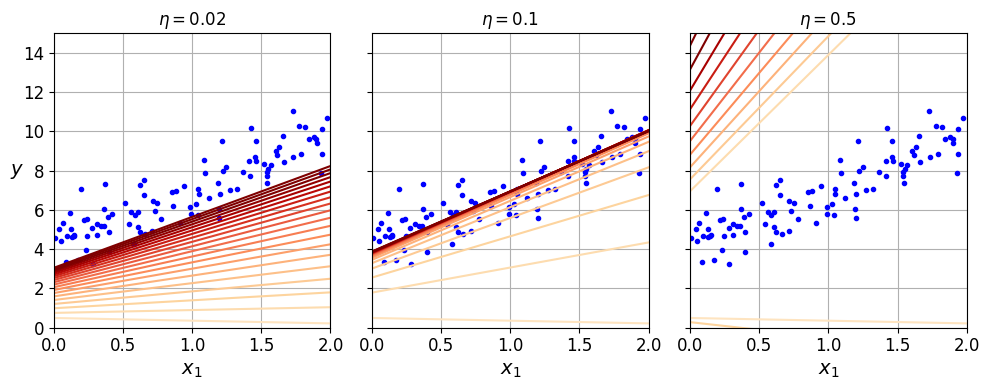

In [15]:
import matplotlib as mpl

# 경사 하강법을 실행하고, 그 진행 과정을 시각화하는 함수
def plot_gradient_descent(theta, eta):
    m = len(X_b)  # 데이터의 크기 (샘플 수)
    plt.plot(X, y, "b.")  # 훈련 데이터(X, y)를 파란색 점으로 플로팅
    n_epochs = 1000  # 경사 하강법의 반복 횟수
    n_shown = 20  # 몇 번의 반복마다 그래프에 결과를 표시할지
    theta_path = []  # 각 반복마다의 theta 값을 저장할 리스트

    # 경사 하강법을 n_epochs만큼 반복
    for epoch in range(n_epochs):
        if epoch < n_shown:  # 처음 20번의 반복에 대해 그래프에 예측 값을 표시
            y_predict = X_new_b @ theta  # 예측 값 계산
            color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))  # 색상 계산 (그라디언트 색상)
            plt.plot(X_new, y_predict, linestyle="solid", color=color)  # 예측 값 플로팅
        gradients = 2 / m * X_b.T @ (X_b @ theta - y)  # 기울기 계산 (MSE 비용 함수의 기울기)
        theta = theta - eta * gradients  # 파라미터 업데이트
        theta_path.append(theta)  # 업데이트된 theta 값을 저장

    plt.xlabel("$x_1$")  # x축 레이블
    plt.axis([0, 2, 0, 15])  # x축과 y축의 범위 설정
    plt.grid()  # 그리드 표시
    plt.title(fr"$\eta = {eta}$")  # 그래프 제목 (학습률을 포함)
    return theta_path  # 업데이트된 theta 값을 반환

# 랜덤 초기화된 theta 값 설정
np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화

# 그래프의 크기 설정
plt.figure(figsize=(10, 4))

# 첫 번째 서브플롯: 학습률 0.02
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0)  # y축 레이블 설정

# 두 번째 서브플롯: 학습률 0.1
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)
plt.gca().axes.yaxis.set_ticklabels([])  # y축의 눈금 레이블 숨기기

# 세 번째 서브플롯: 학습률 0.5
plt.subplot(133)
plt.gca().axes.yaxis.set_ticklabels([])  # y축의 눈금 레이블 숨기기
plot_gradient_descent(theta, eta=0.5)

# 그래프를 파일로 저장
save_fig("gradient_descent_plot")

# 그래프 화면에 표시
plt.show()


## Stochastic Gradient Descent

**확률적 경사 하강법 (Stochastic Gradient Descent)**

- 배치 경사 하강법의 주요 문제: 전체 훈련 세트를 사용해 매번 기울기를 계산하는 데 시간이 많이 걸림(훈련 세트가 크면 그만큼 속도가 느려짐)
- 확률적 경사 하강법(Stochastic Gradient Descent, SGD): 훈련 세트에서 무작위로 하나의 샘플 선택, 그 샘플에 대해서만 기울기 계산
- 장점
 - 한 번에 하나의 샘플만 처리하기 때문에 알고리즘이 훨씬 빠르게 동작
 - 매번 처리하는 데이터가 적기 때문에 반복마다 계산이 빠르고, 훈련 세트가 매우 커도 한 번에 하나의 샘플만 메모리에 로드하면 되므로 메모리 효율적(아웃-오브-코어 알고리즘으로 구현, 1장 참조)
- 단점
 - 무작위성(stochastic) 때문에 배치 경사 하강법보다 훨씬 덜 규칙적
 - 비용 함수가 최소값에 도달하기 전에 위아래로 튕기듯이 변하며, 평균적으로는 감소하지만, 한 번 최소값에 근접하더라도 계속해서 튕기기만 하고 안정 X
 - 알고리즘이 종료되면 최종 파라미터 값은 좋지만 최적은 아님

In [16]:
theta_path_sgd = []  # 추가 코드: SGD에서 각 반복마다의 theta 값을 저장할 리스트
                     # 파라미터 공간(parameter space)에서의 변화 시각화를 위해 사용됨


Saving figure sgd_plot


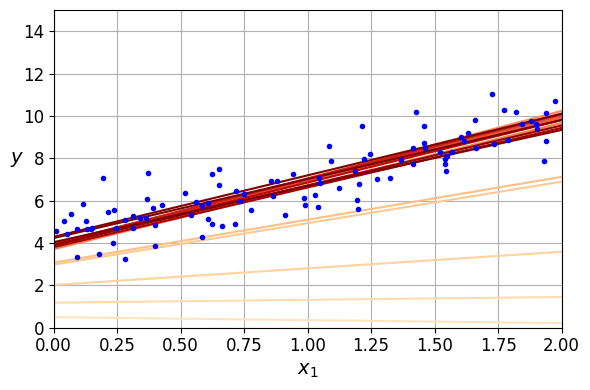

In [17]:
n_epochs = 50
t0, t1 = 5, 50 # 학습률 파라미터 (t0은 학습률이 시작되는 초기 시점 설정, t1은 학습률이 완전히 감소할 때 설정)

def learning_schedule(t):
    return t0 / (t + t1) # 시간이 지날수록 eta(학습률)가 점점 작아짐

np.random.seed(42)
theta = np.random.randn(2, 1)  # 무작위 초기화(시드 고정)

n_shown = 20  # 시각화 설정
plt.figure(figsize=(6, 4))

for epoch in range(n_epochs): # epoch 횟수만큼 반복
    for iteration in range(m): # 각 에포크마다 m개의 샘플을 하나씩 뽑아서 학습

        # 첫 번째 에포크 동안 처음 20개의 반복에 대해서만 모델이 그 순간 어떤 예측을 하는지 선형 회귀선을 그림
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, color=color)

        random_index = np.random.randint(m) # 무작위로 하나의 훈련 샘플 선택
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # 해당 샘플에 대한 오차(예측값 - 실제값)를 기반으로 경사를 계산
        eta = learning_schedule(epoch * m + iteration) # 현재 학습 단계에 따라 학습률을 계산
        theta = theta - eta * gradients # 파라미터 업데이트
        theta_path_sgd.append(theta)  # 변화 경로 저장

# 시각화 코드
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
save_fig("sgd_plot")
plt.show()

In [18]:
theta

array([[4.21076011],
       [2.74856079]])

인스턴스 무작위 선택 -> 어떤 인스턴스는 한 에포크 내에서 여러 번 선택, 어떤 인스턴스는 전혀 선택되지 않을 수도 있음

각 에포크마다 알고리즘이 모든 인스턴스를 반드시 거치도록 하려면, 훈련 세트를 섞은 후(입력 특성과 라벨을 함께 섞어야 함!!)  
인스턴스를 하나씩 순서대로 처리하고 다시 섞는 과정을 반복 가능
(일반적으로 수렴 속도가 더 느림)

SGD에서 파라미터가 평균적으로 전역 최적점으로 수렴하게 하려면 훈련 인스턴스가 독립적이고 동일한 분포(IID)를 따라야 함
- 이를 보장하는 간단한 방법은 훈련 중 인스턴스를 섞는 것(예: 각 인스턴스를 무작위로 선택하거나, 각 에포크 시작 시 훈련 세트를 섞음)
- 인스턴스를 섞지 않으면(인스턴스가 라벨 순으로 정렬되어 있다면) SGD는 한 라벨에 대해 먼저 최적화를 진행한 후, 다음 라벨을 최적화하는 방식으로 진행되며 전역 최솟값 근처에 수렴하지 않게 됨

Scikit-Learn을 사용해 Stochastic Gradient Descent 방식의 선형 회귀를 수행하려면 SGDRegressor 클래스 사용(제곱 오차 비용 함수 최적화)

In [19]:
from sklearn.linear_model import SGDRegressor

# SGDRegressor 모델 생성 (최대 1000번 반복, tol 기준으로 조기 종료, 정규화 없음, 학습률 0.01, 100번 동안 개선 없으면 종료)
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)

# 모델 학습 수행 (y는 1차원 배열이어야 하므로 ravel()로 변형)
sgd_reg.fit(X, y.ravel())


SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [20]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

## Mini-batch Gradient Descent

각 단계마다 전체 훈련 세트를 기반으로 경사를 계산(Batch GD)하거나  
단 하나의 인스턴스를 기반으로 계산하는 대신(Stochastic GD)  
Mini-batch GD는 미니배치(mini-batch)라고 불리는 소규모 무작위 인스턴스 집합을 기반으로 경사 계산

Mini-batch GD가 Stochastic GD보다 좋은 점
- GPU를 사용할 때 행렬 연산의 하드웨어 최적화를 통해 성능 향상을 얻을 수 있음
- 파라미터 공간에서의 진행 경로가 Stochastic GD보다 덜 불규칙
- 특히 미니배치의 크기가 꽤 큰 경우 더욱
- 그 결과 Mini-batch GD는 Stochastic GD보다 최소값 근처를 좀 더 안정적으로 탐색하게 됨
- 하지만(선형 회귀와 달리 지역 최소값이 존재하는 문제의 경우) 지역 최소값에서 빠져나오는 것은 더 어려울 수 있음

다음 그림은 세 가지 경사 하강법 알고리즘이 학습 중 파라미터 공간에서 이동한 경로  
모두 최소값 근처에 도달하지만, Batch GD는 실제로 최소값에서 멈추는 반면,   Stochastic GD와 Mini-batch GD는 계속 움직임  
하지만 Batch GD는 한 걸음을 내딛는 데 시간이 오래 걸림  
Stochastic GD와 Mini-batch GD도 좋은 학습률 스케줄을 사용한다면 최소값에 도달

Saving figure gradient_descent_paths_plot


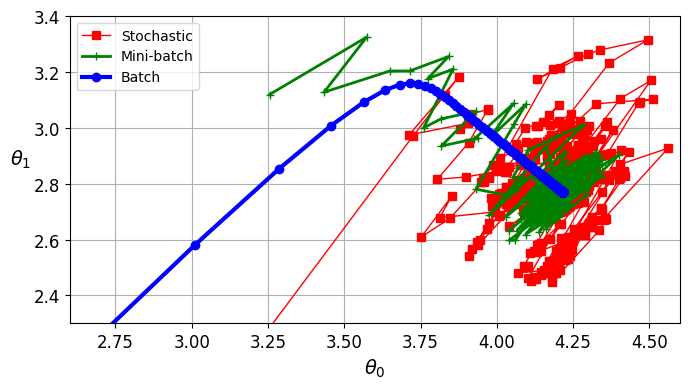

In [21]:
from math import ceil

n_epochs = 50  # 에폭 수
minibatch_size = 20  # 미니배치 크기
n_batches_per_epoch = ceil(m / minibatch_size)  # 한 에폭당 배치 수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 파라미터 랜덤 초기화

t0, t1 = 200, 1000  # 학습률 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)  # 학습률 점진적 감소 함수

theta_path_mgd = []  # 미니배치 경로 저장용
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)  # 데이터 셔플링
    X_b_shuffled = X_b[shuffled_indices]  # 셔플된 입력
    y_shuffled = y[shuffled_indices]  # 셔플된 타깃
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size  # 배치 인덱스 계산
        xi = X_b_shuffled[idx : idx + minibatch_size]  # 입력 미니배치
        yi = y_shuffled[idx : idx + minibatch_size]  # 타깃 미니배치
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)  # 경사 계산
        eta = learning_schedule(epoch * n_batches_per_epoch + iteration)  # 현재 학습률
        theta = theta - eta * gradients  # 파라미터 업데이트
        theta_path_mgd.append(theta)  # 경로 저장

# 경로 배열로 변환
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

# 경사하강법 경로 시각화
plt.figure(figsize=(7, 4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1,
         label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2,
         label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3,
         label="Batch")
plt.legend(loc="upper left")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$   ", rotation=0)
plt.axis([2.6, 4.6, 2.3, 3.4])
plt.grid()
save_fig("gradient_descent_paths_plot")  # 그래프 저장
plt.show()


선형회귀 알고리즘 비교

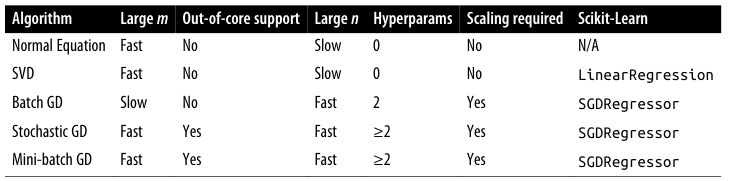

학습이 끝난 후에는 거의 차이가 없음  
모두 매우 유사한 모델로 수렴하고 예측 방식도 완전히 동일

# Polynomial Regression

선형 모델을 사용해서 비선형 데이터도 학습시킬 수 있음  
=> **다항 회귀(Polynomial Regression)**  
각 특성(feature)의 거듭제곱을 새로운 특성으로 추가한 다음 이 확장된 특성 집합에 대해 선형 모델 훈련  

In [22]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3 # -3과 3 사이의 값을 가지는 입력값 X 생성
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1) # 이차식 y = 0.5X² + X + 2에 정규분포를 따르는 랜덤 노이즈 추가

Saving figure quadratic_data_plot


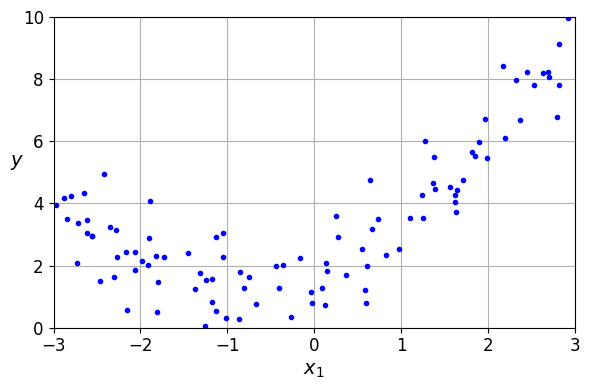

In [23]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_data_plot")
plt.show()

직선(선형 회귀선)으로는 이 데이터를 제대로 표현할 수 없으므로 Scikit-Learn의 PolynomialFeatures 클래스를 사용해서 훈련 데이터 변환

이 클래스는 훈련 세트에 있는 각 특성(feature)의 **거듭제곱(여기서는 제곱)**을 새로운 특성으로 추가

In [24]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False) # degree=2는 2차 항까지 추가, include_bias=False는 상수항(절편 항)은 추가하지 않음
X_poly = poly_features.fit_transform(X) #  X를 변환해서 원래 값과 그 제곱 값을 포함한 새로운 배열 생성
X[0]

array([-0.75275929])

In [25]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_ # 모델의 절편(상수항), 각 특성에 대한 계수(기울기)

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Saving figure quadratic_predictions_plot


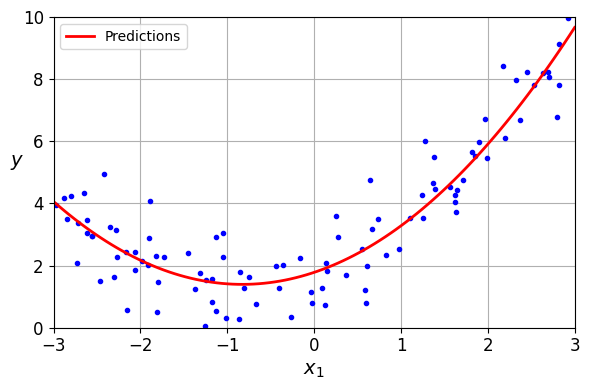

In [27]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4))
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper left")
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("quadratic_predictions_plot")
plt.show()

특성이 여러 개일 경우 특성들 사이의 관계도 찾아낼 수 있음  
단순 선형 회귀로는 불가능, PolynomialFeatures가 주어진 차수까지의 모든 특성 조합을 추가해주기 때문에 가능

예를 들어, 특성이 a와 b 두 개일 때 degree=3으로 설정하면  
a², a³, b², b³뿐 아니라 ab, a²b, ab²와 같은 조합도 추가

PolynomialFeatures(degree=d)는 n개의 특성을 (𝑛+𝑑)!/𝑑!𝑛! 개의 특성으로 변환  
n!은 n 팩토리얼

특성 수가 급격히 늘어나는 조합 폭발(combinatorial explosion) 주의

# Learning Curves

고차 다항 회귀(예: 차수가 높은 Polynomial Regression)를 수행하면 단순 선형 회귀보다 훈련 데이터를 훨씬 더 잘 맞추게 됨

예를 들어 다음 그래프에서는 앞서 사용한 훈련 데이터에 대해 300차 다항 회귀 모델을 적용하고 그 결과를 선형 모델과 2차 다항 모델과 비교

300차 모델이 훈련 샘플에 최대한 가깝게 맞추기 위해 지그재그로 요동침

Saving figure high_degree_polynomials_plot


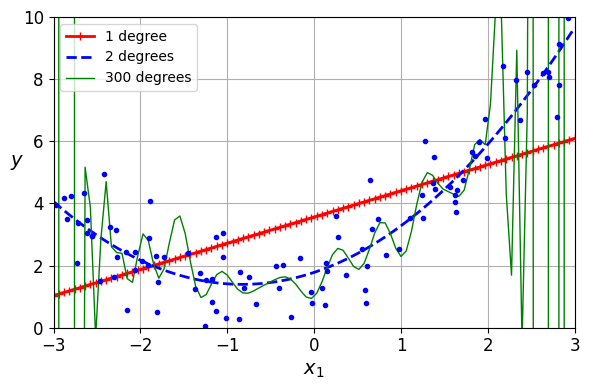

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(6, 4))

for style, width, degree in (("r-+", 2, 1), ("b--", 2, 2), ("g-", 1, 300)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f"{degree} degree{'s' if degree > 1 else ''}"
    plt.plot(X_new, y_newbig, style, label=label, linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()
save_fig("high_degree_polynomials_plot")
plt.show()

고차 다항 회귀 모델: 과적합(overfitting)  
선형 모델: 과소적합(underfitting)

-> 이 경우 일반화 성능이 가장 좋은 모델은 2차 다항 모델(데이터 자체가 2차 방정식을 기반으로 생성되었기 때문에 당연함)

하지만 일반적으로는 데이터를 생성한 함수가 무엇인지 알 수 없음
그렇다면 모델의 복잡도를 어떻게 결정해야 할까?
모델이 과적합인지 과소적합인지는 어떻게 알 수 있는가?

**교차 검증(cross-validation)**을 사용하면 모델의 일반화 성능 추정 가능
 - 훈련 데이터에서는 잘 작동하지만 교차 검증 지표에서는 성능이 낮음 → 과적합
 - 훈련 데이터와 교차 검증 모두에서 성능이 낮음 → 과소적합

또 다른 방법은 **학습 곡선(learning curve)** 살펴보는 것  
학습 곡선은 훈련 세트 크기(또는 훈련 반복 횟수)에 따라 모델이 훈련 세트와 검증 세트에서 얼마나 잘 작동하는지를 나타낸 그래프

이 곡선을 그리기 위해서는 훈련 세트의 크기를 달리하면서 여러 번 모델을 학습시켜야


Saving figure underfitting_learning_curves_plot


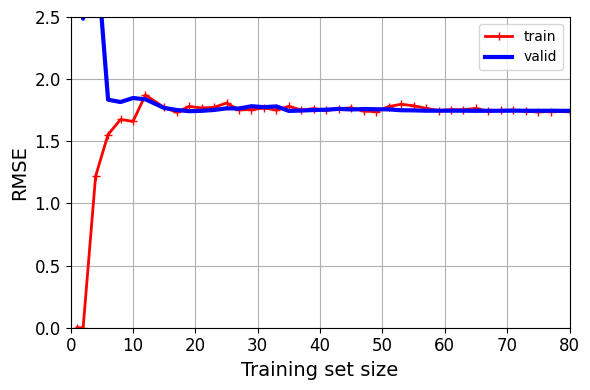

In [29]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")

plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.legend(loc="upper right")
plt.axis([0, 80, 0, 2.5])
save_fig("underfitting_learning_curves_plot")

plt.show()

**[훈련 데이터에 대한 성능]**  
훈련 세트에 샘플이 한두 개밖에 없을 때는 모델이 그것들을 완벽하게 맞출 수 있음(그래프가 0에서 시작)

새로운 샘플들이 추가 -> 데이터에 노이즈가 있고, 선형이 아니기 때문에 모델이 훈련 데이터를 완벽하게 맞출 수 없게 됨

이로 인해 훈련 데이터에 대한 오차가 점점 증가하다가 **어느 순간 평평한 구간(plateau)**에 도달  
그 이후로는 훈련 샘플을 더 추가해도 평균 오차가 거의 나아지거나 나빠지지 않음

**[검증 데이터(validation set)에 대한 성능]**  
훈련 샘플이 너무 적을 때는 모델이 제대로 일반화하지 못하므로 검증 오차가 처음에는 크게 나옴  
하지만 훈련 샘플이 늘어남에 따라 모델이 점차 학습하게 되고, 검증 오차는 서서히 줄어듦

직선(선형 모델)은 이 데이터를 잘 표현할 수 없으므로 결국 오차가 또 평평한 구간에 도달하게 됨  
이때 두 곡선은 서로 가깝고 둘 다 오차가 꽤 높음.

이런 학습 곡선은 *과소적합된 모델의 전형적인 형태*  
두 곡선 모두 평평해졌고 서로 가까우며 오차 수준도 높음

모델이 훈련 데이터를 과소적합하고 있다면 훈련 샘플을 더 추가하는 것은 도움이 되지 않음  
-> **더 복잡한 모델을 사용하거나, 더 나은 특성을 설계해야 함**

In [30]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False), # 10차 다항 회귀 모델
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error") # 전체 훈련 세트의 1%에서 100%까지 40단계로 나눠서 학습, 5겹 교차 검증 사용

Saving figure learning_curves_plot


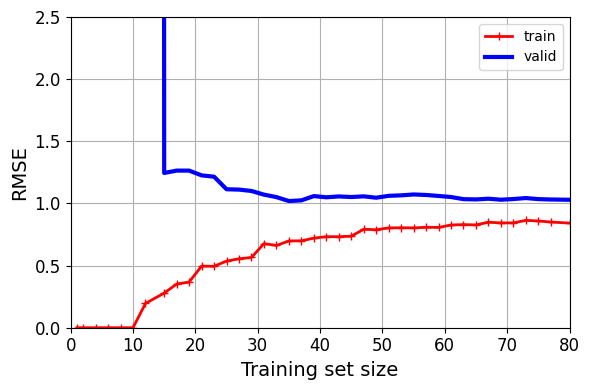

In [31]:
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.figure(figsize=(6, 4))
plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid")
plt.legend(loc="upper right")
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.grid()
plt.axis([0, 80, 0, 2.5])
save_fig("learning_curves_plot")
plt.show()

이 학습 곡선은 이전 곡선들과 비교했을 때 매우 중요한 두 가지 차이점

1. 훈련 데이터에 대한 오차가 선형 회귀 모델보다 훨씬 낮음
2. 두 곡선 사이에 간격 존재

이는 모델이 훈련 데이터에서는 훨씬 더 잘 작동하지만 검증 데이터에서는 그렇지 않다는 것을 의미

이런 특성은 **과적합(overfitting) 모델의 전형적인 특징**

하지만 훨씬 더 큰 훈련 세트를 사용하면 두 곡선은 점차 가까워지게 됨

과적합된 모델을 개선하는 한 가지 방법은 **훈련 데이터를 더 많이 공급하는 것**  
이렇게 하면 검증 오차가 훈련 오차에 가까워질 수 있음

**편향/분산 트레이드오프 (The Bias/Variance Trade-off)**  

통계학과 머신러닝 이론에서 중요한 결과 중 하나는, **모델의 일반화 오류(generalization error)**가 서로 다른 세 가지 오류의 합으로 표현된다는 점

1. 편향(Bias)
- 잘못된 가정에서 비롯된 오류
- 예를 들어, 실제로는 이차 함수인데 선형이라고 가정하는 경우가 해당
- 편향이 높은 모델은 훈련 데이터를 잘 학습하지 못해, 과소적합(underfitting) 되기 쉬움

2. 분산(Variance)
- 훈련 데이터의 작은 변화에 민감하게 반응할 때 발생하는 오류
- 자유도가 높은 모델(예: 고차 다항 회귀)은 분산이 커져서 과적합(overfitting) 되기 쉬움

3. 비감소 오류(Irreducible error)
- 데이터 자체에 존재하는 노이즈 때문에 발생하는 오류
- 이 오류는 모델로 줄일 수 없고 센서 오류나 이상치 제거 등 데이터 정제를 통해서만 줄일 수 있음

# Regularized Linear Models

과적합(overfitting)을 줄이는 좋은 방법 중 하나는 모델을 정규화(regularize)하는 것
-> 즉 모델에 제약을 가함으로써 자유도를 줄이면 데이터를 과하게 학습하기가 더 어려워짐

다항 회귀 모델을 정규화하는 가장 간단한 방법은 다항식의 차수(degree)를 줄이는 것

선형 모델의 경우 가중치(weight)에 제약을 가함으로써 정규화 수행

세 가지 방식의 정규화 기법: 릿지 회귀(Ridge Regression), 라쏘 회귀(Lasso Regression), 엘라스틱넷(Elastic Net)  
각각 다른 방식으로 가중치에 제약을 가함

## Ridge Regression

**릿지 회귀 (Ridge Regression)**

Tikhonov 정규화라고도 불림  
선형 회귀의 정규화된 형태  
비용 함수(cost function)에 **가중치 θ의 제곱합 $\alpha \sum_{i=1}^{n} \theta_i^2$**이 정규화 항으로 추가됨

이 정규화 항은 학습 알고리즘이 단순히 데이터를 잘 맞추는 것뿐만 아니라,  
모델의 가중치를 가능한 한 작게 유지하도록 강제함

주의할 점: 정규화 항은 오직 훈련 중에만 비용 함수에 추가해야 함  
모델을 평가할 때는 정규화되지 않은 원래의 성능 지표를 사용하는 것이 바람직

훈련에 사용되는 비용 함수와 테스트에 사용하는 성능 지표가 서로 다를 수 있음

그 이유는 훈련용 비용 함수는 최적화가 용이한 미분 구조를 가져야 하고,  
테스트용 성능 지표는 최종 목적과 최대한 가까워야 하기 때문

예를 들어 **분류기(classifier)**는 종종 로그 손실(log loss) 같은 비용 함수로 학습되지만  
평가 시에는 **정밀도(precision)**나 재현율(recall) 같은 지표로 성능을 측정

하이퍼파라미터 **α (알파)**는 얼마나 정규화를 강하게 할지를 조절

α = 0이면 릿지 회귀는 단순한 선형 회귀와 동일해짐

α가 매우 크면 모든 가중치가 거의 0에 가까워지고, 결과적으로 데이터 평균을 지나는 평평한 직선이 됨

$J(\boldsymbol{\theta}) = \mathrm{MSE}(\boldsymbol{\theta}) + \alpha \frac{1}{2} \sum_{i=1}^{n} \theta_i^2$


편향 항 𝜃0는 정규화하지 않는다는 점에 주의(합이 𝑖=0부터가 아니라 𝑖=1부터 시작)

만약 𝜃1부터 𝜃n까지의 특성 가중치를 하나의 벡터 𝑤로 정의하면,  
정규화 항은 $\frac{1}{2} \left( \lVert \mathbf{w} \rVert_2 \right)^2$


여기서 $\lVert \mathbf{w} \rVert_2$는 가중치 벡터의 ℓ₂노름(norm)을 의미  
즉, 가중치 제곱합의 제곱근

경사 하강법을 사용할 경우, MSE의 그래디언트(기울기 벡터)에 𝛼𝑤를 추가해주면 됨

---

릿지 회귀를 수행하기 전에 **입력 특성의 스케일을 맞추는 것(StandardScaler 등)**이 매우 중요  
릿지 회귀는 입력값의 스케일에 민감하기 때문(대부분의 정규화 모델 해당)


In [32]:
np.random.seed(42)  # 난수 고정 (재현 가능성 확보)
m = 20  # 샘플 수

X = 3 * np.random.rand(m, 1)  # 0~3 범위의 입력값 20개 생성
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5  # 선형 관계 + 노이즈 추가

X_new = np.linspace(0, 3, 100).reshape(100, 1)  # 0~3 구간의 테스트용 입력 100개


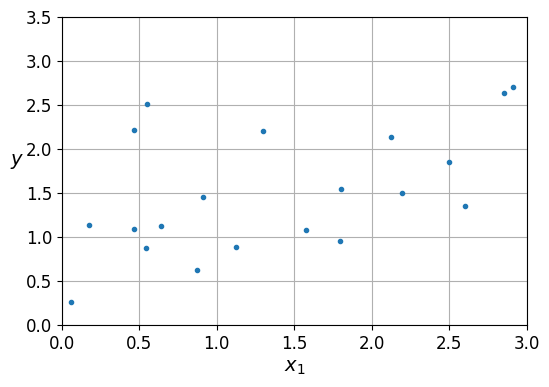

In [33]:
plt.figure(figsize=(6, 4))
plt.plot(X, y, ".")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)
plt.axis([0, 3, 0, 3.5])
plt.grid()
plt.show()

In [34]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")  # 릿지 회귀 객체 생성 (α=0.1, Cholesky 해법 사용)
ridge_reg.fit(X, y)  # 모델 학습
ridge_reg.predict([[1.5]])  # 입력값 1.5에 대한 예측 수행


array([1.55325833])

Saving figure ridge_regression_plot


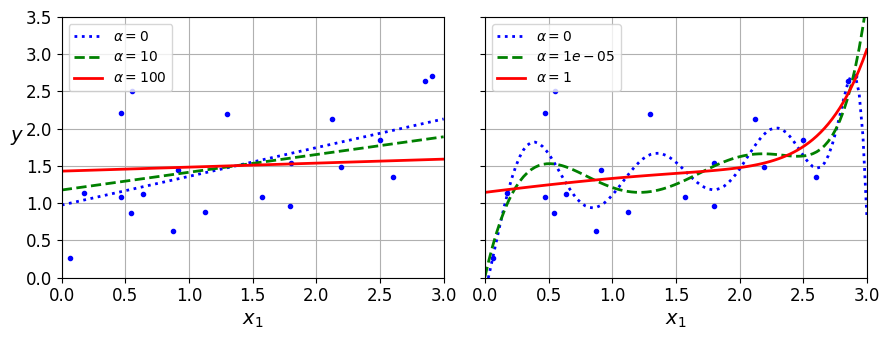

In [35]:

def plot_model(model_class, polynomial, alphas, **model_kwargs):
    plt.plot(X, y, "b.", linewidth=3)
    for alpha, style in zip(alphas, ("b:", "g--", "r-")):
        if alpha > 0:
            model = model_class(alpha, **model_kwargs)
        else:
            model = LinearRegression()
        if polynomial:
            model = make_pipeline(
                PolynomialFeatures(degree=10, include_bias=False),
                StandardScaler(),
                model)
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        plt.plot(X_new, y_new_regul, style, linewidth=2,
                 label=fr"$\alpha = {alpha}$")
    plt.legend(loc="upper left")
    plt.xlabel("$x_1$")
    plt.axis([0, 3, 0, 3.5])
    plt.grid()

plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("ridge_regression_plot")
plt.show()

위 그래프에서는 다양한 α 값을 사용한 여러 릿지 모델을 보여줌

왼쪽: 기본 릿지 모델을 적용한 경우로, 선형 예측 결과를 생성  
오른쪽: 먼저 PolynomialFeatures(degree=10)으로 입력을 다항 특성으로 확장하고,  
이후 StandardScaler로 스케일을 조정한 다음, 릿지 모델 적용  
→ **릿지 정규화가 적용된 다항 회귀(Polynomial Regression with Ridge)**

α 값을 키울수록 예측이 평탄해짐(덜 극단적이고 더 합리적인 형태가 됨)  
→ 모델의 분산(variance)은 줄이고, 편향(bias)은 증가시키는 효과

선형 회귀(Linear Regression)와 마찬가지로 **릿지 회귀(Ridge Regression)**도 **closed-form equation**을 사용하거나 **경사 하강법**으로 수행할 수 있음  
장단점은 선형 회귀와 동일

$$
\hat{\boldsymbol{\theta}} = \left( \mathbf{X}^\top \mathbf{X} + \alpha \mathbf{A} \right)^{-1} \mathbf{X}^\top \mathbf{y}
$$


위는 릿지 회귀의 정규 방정식 해(closed-form solution)  
여기서 **A는 (n+1) × (n+1) 단위 행렬(identity matrix)**이며  
왼쪽 위 원소(편향 항에 해당)는 0으로 설정됨

In [36]:
# 확률적 경사 하강법(SGD) 사용
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets
sgd_reg.predict([[1.5]])

array([1.55302613])

In [37]:
# cholesky (수학 공식, 해석적 풀이)
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([1.55071465])

In [38]:
# 확률적 평균 경사 하강법 (SAG)
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])


array([1.55326019])

정규화 항의 종류를 지정하는 하이퍼파라미터는 penalty  
l2로 설정하면, SGD가 비용 함수에 가중치 벡터의 ℓ₂ 노름 제곱의 절반을 더하도록 만듦(릿지 회귀에서 쓰는 정규화 항과 완전히 동일한 수학적 구조)

## Lasso Regression

최소 절댓값 수축 및 선택 연산자 회귀(라쏘 회귀)는 선형 회귀의 또 다른 정규화된 버전  
릿지 회귀와 마찬가지로 비용 함수에 정규화 항을 추가하지만,   
ℓ₂ 노름의 제곱의 절반 대신 가중치 벡터의 ℓ₁ 노름을 사용

$$
J(\boldsymbol{\theta}) = \mathrm{MSE}(\boldsymbol{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i|
$$


In [39]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

Saving figure lasso_regression_plot


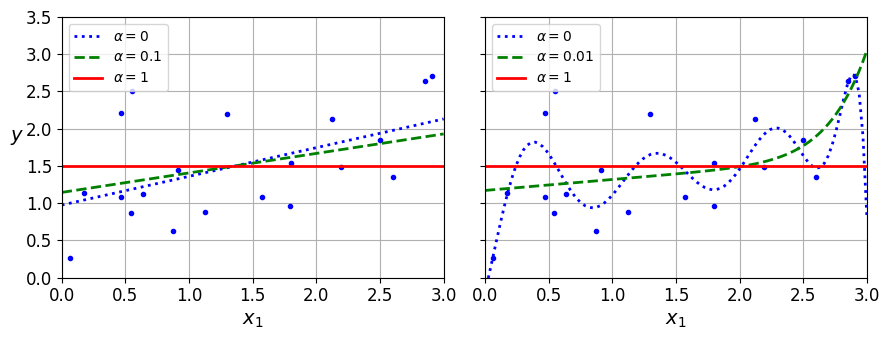

In [40]:
plt.figure(figsize=(9, 3.5))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$  ", rotation=0)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 1e-2, 1), random_state=42)
plt.gca().axes.yaxis.set_ticklabels([])
save_fig("lasso_regression_plot")
plt.show()

라쏘 회귀의 중요한 특성 중 하나는 덜 중요한 특성들의 가중치를 제거하는 경향이 있다는 것(즉, 해당 가중치를 0으로 만듦)  
예를 들어, 위 그래프 중 오른쪽에 있는 점선 (α = 0.01)은 거의 선형에 가까운 이차 함수 형태  
이는 고차 다항 특성들의 가중치가 모두 0이 되었기 때문  
=> 라쏘 회귀는 자동으로 특성 선택을 수행, 희소한 모델(대부분의 가중치가 0인 모델) 출력

왜 이런 일이 발생하는지 감을 잡기 위해 아래 그래프 참고

Saving figure lasso_vs_ridge_plot


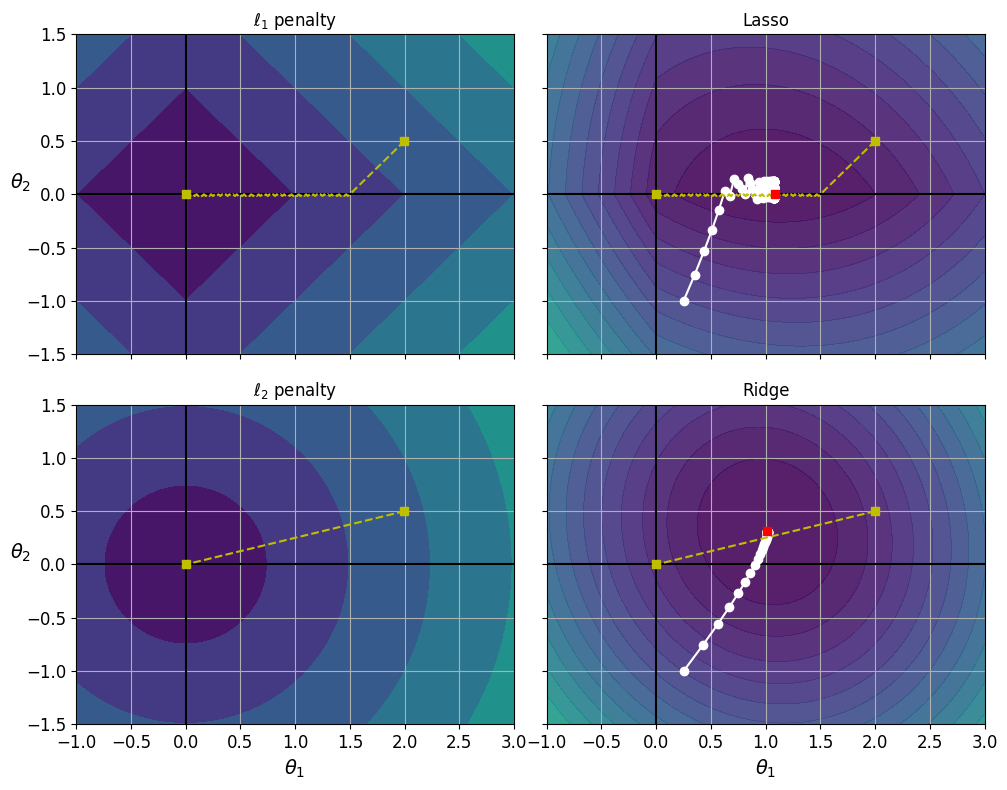

In [41]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

t1s = np.linspace(t1a, t1b, 500)
t2s = np.linspace(t2a, t2b, 500)
t1, t2 = np.meshgrid(t1s, t2s)
T = np.c_[t1.ravel(), t2.ravel()]
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

J = (1 / len(Xr) * ((T @ Xr.T - yr.T) ** 2).sum(axis=1)).reshape(t1.shape)

N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(J.argmin(), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])

def bgd_path(theta, X, y, l1, l2, core=1, eta=0.05, n_iterations=200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = (core * 2 / len(X) * X.T @ (X @ theta - y)
                     + l1 * np.sign(theta) + l2 * theta)
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))

for i, N, l1, l2, title in ((0, N1, 2.0, 0, "Lasso"), (1, N2, 0, 2.0, "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2 ** 2

    tr_min_idx = np.unravel_index(JR.argmin(), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levels = np.exp(np.linspace(0, 1, 20)) - 1
    levelsJ = levels * (J.max() - J.min()) + J.min()
    levelsJR = levels * (JR.max() - JR.min()) + JR.min()
    levelsN = np.linspace(0, N.max(), 10)

    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(theta=np.array([[2.0], [0.5]]), X=Xr, y=yr,
                      l1=np.sign(l1) / 3, l2=np.sign(l2), core=0)
    ax = axes[i, 0]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, N / 2.0, levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(fr"$\ell_{i + 1}$ penalty")
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")
    ax.set_ylabel(r"$\theta_2$", rotation=0)

    ax = axes[i, 1]
    ax.grid()
    ax.axhline(y=0, color="k")
    ax.axvline(x=0, color="k")
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$")

save_fig("lasso_vs_ridge_plot")
plt.show()

이 그림에서 축은 두 개의 모델 파라미터를 나타내고, 배경의 등고선은 다양한 손실 함수의 값을 나타냄

왼쪽 위 그림에서는 등고선이 ℓ₁ 손실 (|θ₁| + |θ₂|)을 나타냄  
이 손실은 어떤 축에 가까워질수록 선형적으로 감소  
예를 들어, 모델 파라미터를 θ₁ = 2, θ₂ = 0.5로 초기화하면, 경사 하강법을 수행했을 때 두 파라미터가 동일하게 감소(점선 노란색 선으로 표현)  
따라서 θ₂가 먼저 0에 도달(처음부터 0에 더 가까웠기 때문)  
그 후에는 경사 하강법이 수로(gutter)를 따라 굴러가듯이 이동하면서 θ₁ = 0에 도달(ℓ₁의 그래디언트는 거의 0이 되지 않고 항상 ±1이기 때문에 중간에 약간의 튕김은 생김)

오른쪽 위 그림에서는 등고선이 라쏘 비용 함수(MSE + ℓ₁손실)
작은 흰색 원들은 경사 하강법이 모델 파라미터를 최적화할 때의 경로  
여기서 초기값은 θ₁ ≈ 0.25, θ₂ ≈ -1로 설정  
경사 하강법이 빠르게 θ₂ = 0에 도달하고, 이후 수로를 따라 내려가면서 결국 전역 최적점(빨간 네모로 표시됨) 근처에서 튕기게 됨

만약 α 값을 증가시키면, 전역 최적점은 점선 노란색 선을 따라 왼쪽으로 이동  
반대로 α를 줄이면, 전역 최적점은 오른쪽으로 이동  
(이 예제에서 정규화되지 않은 MSE의 최적 파라미터는 θ₁ = 2, θ₂ = 0.5임)

아래쪽 두 그래프는 같은 상황을 ℓ₂ 패널티를 사용했을 때로 바꿔서 보여 줌  
왼쪽 아래 그림에서는 ℓ₂ 손실이 원점에서 멀어질수록 증가  
그래서 경사 하강법은 그 지점을 향해 직선 경로로 이동  

오른쪽 아래 그림에서는 등고선이 릿지 회귀의 비용 함수(즉, MSE + ℓ₂ 손실)를 나타냄

라쏘와 비교했을 때 두 가지 주요 차이점

1. 파라미터가 전역 최적점에 가까워질수록 그래디언트 크기가 점점 작아짐 ->   
 그래서 경사 하강법이 자연스럽게 느려지고, 튀지 않고 수렴을 잘함

2. α 값을 증가시키면 **최적 파라미터(빨간 네모)**는 원점에 점점 가까워지긴 하지만, 완전히 0으로 떨어지지는 않음

라쏘를 사용할 때, 경사 하강법이 최적점 근처에서 계속 튀는 현상을 피하려면 학습률을 점차 줄여야 함  
그러면 튀는 현상은 여전히 발생하지만, 점점 작아져서 결국 수렴

라쏘 비용 함수는 𝜃𝑖=0(i = 1, 2, ⋯, n)일 때 미분 불가능  
하지만 이 경우 서브그래디언트(subgradient) 벡터 $\mathbf{g}^{13}$
를 사용하면 경사 하강법을 문제없이 사용할 수 있음

다음 식은 라쏘 비용 함수에 대해 경사 하강법에서 사용할 수 있는 서브그래디언트 벡터 식

$$
\mathbf{g}(\boldsymbol{\theta}, J) = \nabla_{\boldsymbol{\theta}} \mathrm{MSE}(\boldsymbol{\theta}) + \alpha
\begin{pmatrix}
\mathrm{sign}(\theta_1) \\
\mathrm{sign}(\theta_2) \\
\vdots \\
\mathrm{sign}(\theta_n)
\end{pmatrix}
\quad \text{where} \quad
\mathrm{sign}(\theta_i) =
\begin{cases}
-1 & \text{if } \theta_i < 0 \\
0 & \text{if } \theta_i = 0 \\
+1 & \text{if } \theta_i > 0
\end{cases}
$$


In [42]:
from sklearn.linear_model import Lasso  # Lasso 회귀 모델 불러오기
lasso_reg = Lasso(alpha=0.1)  # Lasso 모델 객체 생성 (정규화 강도 alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

위 코드 대신 SGDRegressor(penalty="l1")을 사용할 수도 있음

## Elastic Net

- Ridge 회귀와 Lasso 회귀의 중간 형태
- 정규화 항은 Ridge와 Lasso의 정규화 항을 섞은 것
- 혼합 비율은 r로 조절
- r = 0이면 Ridge 회귀와 같고, r = 1이면 Lasso 회귀와 같음

$$
J(\boldsymbol{\theta}) = \text{MSE}(\boldsymbol{\theta}) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1 - r}{2} \alpha \sum_{i=1}^{n} \theta_i^2
$$


- 첫 번째: 평균 제곱 오차 (MSE)
- 두 번째: Lasso에서 사용하는 L1 정규화 항
- 세 번째: Ridge에서 사용하는 L2 정규화 항

### 언제 어떤 회귀를 써야 하는가?

정규화가 없는 일반 선형 회귀는 거의 사용하지 않는 것이 좋음  
Ridge 회귀는 기본값으로 좋은 선택  
만약 중요한 특성이 소수라고 생각된다면 Lasso나 Elastic Net 사용  
Lasso와 Elastic Net은 중요하지 않은 특성의 가중치를 0으로 만들어 자동으로 특성 선택을 수행  

일반적으로 Elastic Net이 Lasso보다 더 안정적  

Lasso는 다음과 같은 경우에 불안정하게 작동할 수 있음  
- 특성의 수가 훈련 샘플 수보다 많은 경우
- 여러 특성들이 서로 강하게 상관되어 있는 경우



In [43]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

## Early Stopping

Gradient Descent 같은 반복 학습 알고리즘을 정규화하는 다른 방식: 검증 오차가 최소에 도달했을 때 학습을 중단하는 것  
-> early stopping

다음 그래프는 복잡한 모델(이 경우 고차 다항 회귀 모델)이 Batch Gradient Descent로 학습되는 과정을 보여 줌


In [47]:
# root_mean_squared_error가 scikit-learn에 있는 경우 그대로 가져옴
try:
    from sklearn.metrics import root_mean_squared_error

# ImportError가 발생하면 (즉, 해당 함수가 없으면)
except ImportError:
    from sklearn.metrics import mean_squared_error

    # mean_squared_error를 이용해 RMSE를 직접 계산하는 함수 정의
    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)


Saving figure early_stopping_plot


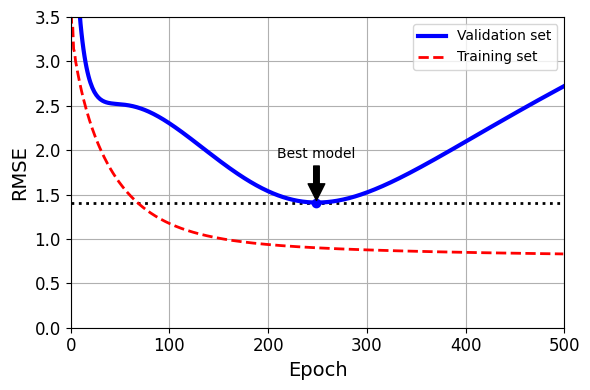

In [46]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# 이전과 동일한 이차 함수 데이터를 생성하고 훈련/검증 세트로 분리
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

# 전처리 파이프라인 – 다항 특성 생성 후 표준화
preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)

# SGD 회귀 모델(정규화 없음, 학습률 eta0 지정)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # 그래프를 위한 에러 기록용

# 학습 반복(에포크)
for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)

    # 검증 세트에 대한 예측 및 RMSE 계산
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)

    # 가장 낮은 검증 RMSE일 경우 모델 저장
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    #  훈련 세트 RMSE 계산하여 저장
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# 그래프 생성 및 저장
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
save_fig("early_stopping_plot")
plt.show()


학습이 진행되면서 알고리즘은 학습을 하게 되고, 훈련 세트에 대한 예측 오차(RMSE)가 감소  
검증 세트에 대한 예측 오차 역시 함께 감소

하지만 시간이 지나면 검증 오차가 더 이상 감소하지 않고 다시 증가  
이는 모델이 훈련 데이터에 대해 **과적합**되기 시작했다는 신호

Early stopping을 사용하면, 검증 오차가 최소에 도달한 순간에 즉시 학습을 멈춤  
매우 단순하고 효율적인 정규화 기법이며, Geoffrey Hinton은 이를 "아름다운 공짜 점심"이라 표현

Stochastic Gradient Descent와 Mini-batch Gradient Descent를 사용할 경우,  
오차 곡선이 그렇게 매끄럽지 않아서 최솟값에 도달했는지 판단하기 어려울 수 있음

한 가지 해결책 ->   
검증 오차가 최소값보다 일정 시간 이상 높은 상태로 유지되었을 때만 학습 멈추기  
(즉, 모델이 더 이상 좋아지지 않을 것이라고 확신할 때)

그리고 나서 검증 오차가 최소였던 시점으로 모델 파라미터를 되돌리는 것

warm_start=True일 경우, fit() 메서드를 호출하면 처음부터 다시 시작하지 않고 이전 상태에서 학습을 계속하는 방식도 있음

# Logistic Regression

일부 회귀 알고리즘은 분류에도 사용할 수 있고 그 반대도 가능

**로지스틱 회귀(Logistic Regression)**는 자주 사용되는 방법으로,  
특정 샘플이 어떤 클래스에 속할 확률을 추정하는 데 사용(예: 이 이메일이 스팸일 확률은 얼마인가?)

추정된 확률이 50%보다 크면,
모델은 해당 샘플이 그 클래스(양성 클래스, 라벨 "1")에 속한다고 예측

그렇지 않으면,
그 클래스에 속하지 않는다고 예측(음성 클래스, 라벨 "0"에 속한다고 봄)

이러한 방식으로 작동하기 때문에 로지스틱 회귀는 **이진 분류기(binary classifier)**



## Estimating Probabilities

Logistic Regression은 어떻게 동작하는가?  
선형 회귀 모델과 마찬가지로, 로지스틱 회귀 모델은 **입력 특성들의 가중합(그리고 바이어스 항 포함)** 계산

하지만 선형 회귀처럼 결과를 그대로 출력하는 것이 아니라
이 결과에 대해 로지스틱 함수를 적용한 값 출력

$\hat{p} = h_{\theta}(\mathbf{x}) = \sigma(\mathbf{x}^\top \boldsymbol{\theta})$  
(로지스틱 회귀 모델의 확률 추정 (벡터화된 형태))

로지스틱 함수(σ(·))는 시그모이드 함수  
S자 모양을 가짐  
출력값은 항상 0과 1 사이의 숫자



$$
\sigma(t) = \frac{1}{1 + \exp(-t)}
$$


Saving figure logistic_function_plot


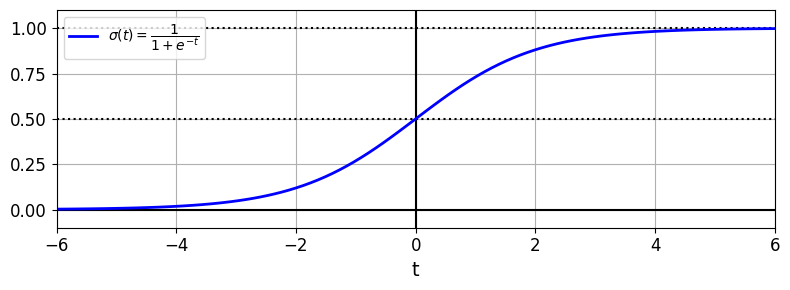

In [49]:
lim = 6
t = np.linspace(-lim, lim, 100)  # t 값 범위 생성
sig = 1 / (1 + np.exp(-t))       # 시그모이드 함수 계산

plt.figure(figsize=(8, 3))

# 기준선들 그리기
plt.plot([-lim, lim], [0, 0], "k-")       # y=0
plt.plot([-lim, lim], [0.5, 0.5], "k:")   # y=0.5 (중앙선)
plt.plot([-lim, lim], [1, 1], "k:")       # y=1 (상한선)
plt.plot([0, 0], [-1.1, 1.1], "k-")       # x=0 (세로 기준선)

# 시그모이드 함수 곡선 그리기
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \dfrac{1}{1 + e^{-t}}$")

plt.xlabel("t")
plt.legend(loc="upper left")
plt.axis([-lim, lim, -0.1, 1.1])              # 축 범위 설정
plt.gca().set_yticks([0, 0.25, 0.5, 0.75, 1])  # y축 눈금 설정
plt.grid()

save_fig("logistic_function_plot")  # 그림 저장
plt.show()


로지스틱 회귀 모델이 어떤 샘플 x가 양성 클래스에 속할 확률 $\hat{p} = h_{0}(\mathbf{x})$를 추정한 후에는 예측값 ŷ를 쉽게 결정할 수 있음


$$
\hat{y} =
\begin{cases}
0 & \text{if } \hat{p} < 0.5 \\
1 & \text{if } \hat{p} \geq 0.5
\end{cases}
$$


σ(t) < 0.5는 t < 0일 때 발생  
σ(t) ≥ 0.5는 t ≥ 0일 때 발생

=> 로지스틱 회귀 모델은 xᵀθ가 양수일 경우 1 예측, 음수일 경우 0 예측

t 점수는 흔히 logit이라 불림  
이 이름은 logit 함수가 로지스틱 함수의 역함수라는 사실에서 유래

logit 함수 정의:
$\text{logit}(p) = \log\left(\frac{p}{1 - p}\right)$

로지스틱 함수의 역함수
확률 p의 logit을 계산하면 결과는 t

logit은 **log-odds(로그 오즈)**라고도 불림  
양성 클래스의 확률과 음성 클래스의 확률의 비율에 대한 로그이기 때문



## Training and Cost Function

이 모델은 어떻게 학습되는가

학습의 목표는 파라미터 벡터 θ를 설정하여  
**양성 샘플(y = 1)**에 대해 높은 확률을 예측하고,  
**음성 샘플(y = 0)**에 대해 낮은 확률을 예측하도록 하는 것

이 개념은 다음 식에 나오는 단일 훈련 샘플 x에 대한 비용 함수로 표현됨

$$
c(\boldsymbol{\theta}) =
\begin{cases}
-\log(\hat{p}) & \text{if } y = 1 \\
-\log(1 - \hat{p}) & \text{if } y = 0
\end{cases}
$$


이 비용 함수는 직관적으로 이해됨  
**−log(t)**는 t가 0에 가까워질수록 매우 커지기 때문  
→ 양성 샘플에 대해 모델이 0에 가까운 확률을 예측하면 비용이 매우 커짐  
→ 마찬가지로 음성 샘플에 대해 1에 가까운 확률을 예측해도 비용이 매우 커짐

반대로 t가 1에 가까우면 −log(t)는 0에 가까워짐  
→ 양성 샘플에서 p가 1에 가까우면 비용이 작고  
→ 음성 샘플에서 p가 0에 가까우면 비용이 작음  
→ 우리가 원하는 정확한 동작 방식



$$
J(\boldsymbol{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{p}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{p}^{(i)}) \right]
$$


△ 로지스틱 회귀의 비용 함수(로그 손실, Log Loss)  
이 비용 함수를 최소화하는 **파라미터 θ의 해석적 해(closed-form solution)**는 알려져 있지 않음  
-> 정규방정식(Normal Equation)처럼 직접 계산할 수 있는 공식이 존재하지 않음  

이 비용 함수는 **볼록(convex)**이기 때문에  
**경사 하강법(Gradient Descent)**이나 다른 최적화 알고리즘을 사용하면  
전역 최솟값을 찾을 수 있다는 것이 보장됨  
(단, 학습률이 너무 크지 않고, 충분히 기다리면 됨)

$$
\frac{\partial}{\partial \theta_j} J(\boldsymbol{\theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \sigma(\boldsymbol{\theta}^\top \mathbf{x}^{(i)}) - y^{(i)} \right) x_j^{(i)}
$$


△ 로지스틱 비용 함수의 편미분

이 식은 **식 4-5(선형 회귀의 그래디언트)**와 매우 유사  
→ 각 샘플마다 예측 오차 계산  
→ 그것을 해당 특성값에 곱해서  
→ 모든 샘플에 대해 평균을 냄

이렇게 해서 모든 편미분 값을 담은 그래디언트 벡터를 만들면
배치 경사 하강법(Batch GD) 알고리즘에 사용할 수 있음

## Decision Boundaries

Logistic Regression을 설명하기 위해 iris 데이터셋 사용  
이 데이터셋은 유명한 예제로,  
세 가지 종의 붓꽃(Iris setosa, Iris versicolor, Iris virginica)에 대한  
꽃받침(sepal)과 꽃잎(petal)의 길이와 너비 정보 150개가 들어 있음

Iris virginica 품종을 분류하는 분류기 만들기  
단 하나의 특성인 **꽃잎 너비(petal width)**만을 사용

In [50]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [51]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [52]:
iris.target.head(3)

,target
0,0
1,0
2,0


In [53]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values # 꽃잎 너비(petal width) 특성만 선택
y = iris.target_names[iris.target] == 'virginica'  # virginica면 True, 아니면 False

# 데이터를 훈련 세트와 테스트 세트로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 로지스틱 회귀 모델 생성 및 학습
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)


LogisticRegression(random_state=42)

Saving figure logistic_regression_plot


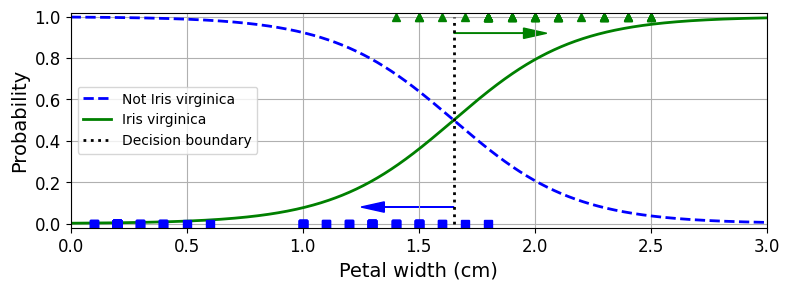

In [56]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 꽃잎 너비가 0cm부터 3cm까지
y_proba = log_reg.predict_proba(X_new)         # 확률 예측
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]  # 결정 경계

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# 결정 경계 화살표 표시
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")

# 훈련 샘플 시각화
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
save_fig("logistic_regression_plot")
plt.show()


In [58]:
decision_boundary

np.float64(1.6516516516516517)

Iris virginica 품종의 꽃들(삼각형)은 꽃잎 너비가 1.4cm ~ 2.5cm 사이  
다른 품종의 붓꽃들(사각형)은 일반적으로 더 작은 꽃잎 너비  
보통 0.1cm ~ 1.8cm 사이

약간의 **겹침(overlap)** 존재  
하지만 2cm 이상에서는 분류기가 그 꽃이 Iris virginica일 가능성이 높다고 매우 확신  
(Iris virginica 클래스의 확률이 높게 나옴)

반면 1cm 이하에서는 Iris virginica가 아닐 가능성이 높다고 확신  
("Not Iris virginica" 클래스의 확률이 높게 나옴)

이 두 극단 사이의 영역에서는 모델이 확신을 갖지 못함  
하지만 predict_proba() 대신 predict() 메서드로 예측을 요청하면,  
모델은 더 높은 확률을 가진 클래스를 선택해서 반환

따라서 두 클래스 확률이 50%로 같아지는 약 1.6cm 지점이 결정 경계  
꽃잎 너비가 1.6cm보다 크면 Iris virginica라고 예측하고,  
그보다 작으면 Iris virginica가 아니라고 예측  
(비록 확신이 크지 않더라도 그렇게 예측함)

In [59]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

Saving figure logistic_regression_contour_plot


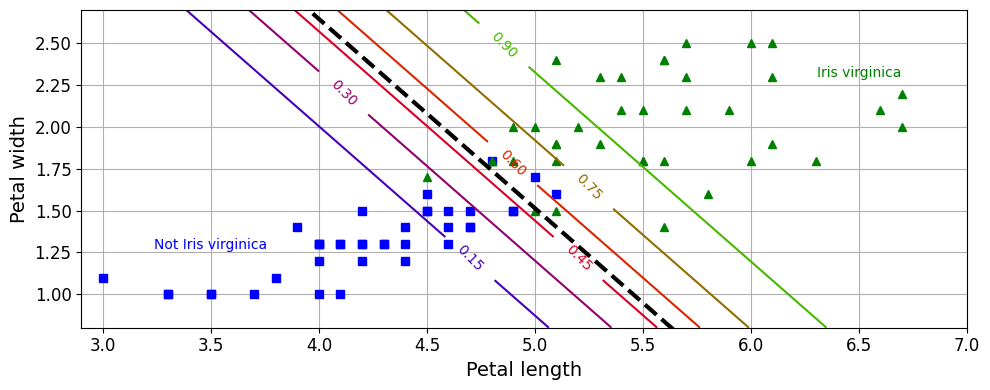

In [61]:
# 두 개의 특성 선택: 꽃잎 길이, 꽃잎 너비
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'  # virginica 여부

# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 로지스틱 회귀 모델 학습 (정규화 약하게: C=2)
log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# 예측 확률 계산용 입력 격자 생성
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# 결정 경계 좌표 계산
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

# 시각화
plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")  # 비 virginica
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")  # virginica
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)  # 등고선 확률 곡선
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)  # 결정 경계선

# 텍스트 라벨 추가
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
save_fig("logistic_regression_contour_plot")
plt.show()


위 그래프는 같은 데이터셋에서 두 가지 특성(꽃잎 너비와 길이) 사용  
학습이 완료된 후 로지스틱 회귀 분류기는 이 두 특성을 바탕으로  
새로운 꽃이 Iris virginica일 확률 추정

점선(dashed line)은 모델이 **확률 50%**로 판단하는 지점  
→ **모델의 결정 경계(decision boundary)**

이 결정 경계는 **선형 경계(linear boundary)**

각각의 평행선은 모델이 특정 확률을 출력하는 지점들을 의미  
→ 아래 왼쪽은 15%, 오른쪽 위로 갈수록 **90%**까지 변함

모델에 따르면 오른쪽 위 선을 넘는 영역에 있는 꽃들은 Iris virginica일 확률이 90% 이상

다른 선형 모델들과 마찬가지로, 로지스틱 회귀 모델도 ℓ₁ 또는 ℓ₂패널티를 사용해   정규화할 수 있음  
Scikit-Learn에서는 기본적으로 ℓ₂ 패널티가 자동으로 적용

Scikit-Learn의 LogisticRegression 모델에서 정규화 강도를 조절하는   하이퍼파라미터는 alpha가 아님  
→ 다른 선형 모델들과는 다르게, 그 역수인 C를 사용

C 값이 클수록 정규화가 약해짐

## Softmax Regression

로지스틱 회귀 모델은 여러 이진 분류기를 학습하고 조합(3장)하지 않고 여러 클래스를 직접 지원하도록 일반화할 수 있음  
=> Softmax 회귀 또는 **다항 로지스틱 회귀(Multinomial Logistic Regression)**

입력 샘플 x가 주어지면, Softmax 회귀 모델은 먼저 각 클래스 k에 대한 점수 $s_k(\mathbf{x})$ 계산  
그 다음, 이 점수들에 softmax 함수(정규화된 지수 함수)를 적용하여 각 클래스의 확률 추정

$$
s_k(\mathbf{x}) = \mathbf{x}^\top \boldsymbol{\theta}^{(k)}
$$


△ 클래스 k에 대한 Softmax 점수

선형 회귀 예측 공식과 매우 유사함

각 클래스는 자신만의 **파라미터 벡터 $\boldsymbol{\theta}^{(k)}$**를 가짐  
이러한 모든 파라미터 벡터들은 보통 **파라미터 행렬 $\boldsymbol{\Theta}$의 행(row)**으로 저장

입력 샘플 x에 대해 모든 클래스의 점수를 계산한 뒤,  
그 점수들을 softmax 함수에 통과시키면  
해당 샘플이 클래스 k에 속할 확률 $\hat{p}_k$을 추정할 수 있음(아래 식 참고)

이 함수는 각 점수의 **지수(exp)**를 계산한 다음  
모든 지수값의 합으로 나누어 정규화  
(softmax는 확률 분포가 되도록 조정)

이 점수들은 일반적으로 로짓(logits) 또는 **로그 오즈(log-odds)**라고 불림  
(하지만 실제로는 정규화되지 않은 log-odds)

$$
\hat{p}_k = \sigma(\mathbf{s(x)})_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}
$$


- K: 클래스의 수
- s(x): 샘플 x에 대해 계산된 각 클래스의 점수를 담은 벡터
- $\sigma(s(\mathbf{x}))_k$: 샘플 x가 클래스 k에 속할 확률의 추정값(주어진 클래스 점수들에 기반)

로지스틱 회귀 분류기와 마찬가지로  
**소프트맥스 회귀 분류기(Softmax Regression classifier)**도 가장 높은 확률이   추정된 클래스를 예측(가장 높은 점수를 가진 클래스를 선택)  

$$
\hat{y} = \arg\max_k \, \sigma(s(\mathbf{x}))_k = \arg\max_k \, s_k(\mathbf{x}) = \arg\max_k \left( \boldsymbol{\theta}^{(k)\top} \mathbf{x} \right)
$$


argmax 연산자: 어떤 함수를 최대로 만드는 변수의 값을 반환  
이 식에서는, 추정 확률 $\sigma(s(\mathbf{x}))_k$를 최대로 만드는 클래스  인덱스 𝑘를 반환

소프트맥스 회귀 분류기는 한 번에 하나의 클래스만 예측함  
즉, 이 모델은 다중 클래스(multi-class) 분류는 가능하지만  
다중 출력(multi-output) 문제에는 적합하지 않음

따라서 **서로 배타적인 클래스들(예: 식물 종류 등)**에만 사용  
한 사진 속 여러 사람을 인식하는 문제에는 사용할 수 없음



학습의 목표는 모델이 정답 클래스에 대해 높은 확률을 추정하도록 만드는 것  
(결과적으로 다른 클래스들에는 낮은 확률을 추정)

이 목표를 달성하기 위해 **아래 식의 비용 함수(cross entropy)**를 최소화  
이 함수는 정답 클래스의 확률이 낮게 예측되었을 때 모델에게 큰 패널티를 줌

**교차 엔트로피(Cross Entropy)**는  
추정된 클래스 확률 분포가 실제 타깃 클래스 분포와 얼마나 잘 맞는지를 측정할 때 자주 사용됨

$$
J(\boldsymbol{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log\left(\hat{p}_k^{(i)}\right)
$$


$y_k^{(i)}$: $i^{\text{th}}$ 샘플이 클래스 k에 속할 확률(target probability)  
→ 보통 이 값은 1 또는 0 중 하나(해당 클래스가 정답이면 1, 아니면 0)


클래스가 2개(K = 2)인 경우  
이 교차 엔트로피 비용 함수는 **로지스틱 회귀의 비용 함수(log loss)**와 같아짐

**Cross Entropy**

크로스 엔트로피(Cross entropy)는 **정보 이론(information theory)**에서 유래함  

예를 들어, 매일 날씨 정보를 효율적으로 전송하고 싶다고 가정  
만약 가능한 날씨 유형이 8가지(맑음, 비, 등등)라면  
각 옵션을 3비트로 인코딩할 수 있음(2^3=8이기 때문)

하지만 만약 대부분 날이 거의 항상 맑다고 예상된다면  
"맑음"을 **1비트(예: 0)**로만 표시하고,  
다른 7가지 옵션은 **4비트(예: 1로 시작하는 코드)**로 표시하는 것이 훨씬 효율적

크로스 엔트로피는 각 옵션에 대해 실제로 전송되는 평균 비트 수를 측정  

만약 날씨에 대한 예상이 완벽하다면,
**크로스 엔트로피는 실제 날씨 자체의 엔트로피(본질적인 예측 불가능성)**와 같아짐

하지만 예상이 틀릴 경우 (예: 비가 자주 오는데 자주 맑다고 가정함)  
크로스 엔트로피는 더 커짐  
→ 이 증가량을 **쿨백–라이블러 발산(Kullback–Leibler divergence, KL 발산)**이라고 함

두 확률 분포 p와 q 사이의 크로스 엔트로피는 다음과 같이 정의(분포가 이산형일 경우):  
$H(p, q) = -\sum_x p(x) \log q(x)$


이 비용 함수의 클래스 𝑘에 대한 그래디언트 벡터($\boldsymbol{\theta}^{(k)}$
)는 다음 식에 의해 주어짐

$$
\nabla_{\boldsymbol{\theta}^{(k)}} J(\boldsymbol{\Theta}) = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{p}_k^{(i)} - y_k^{(i)} \right) \mathbf{x}^{(i)}
$$


이제 각 클래스에 대해 그래디언트 벡터를 계산할 수 있음

그 다음, **경사 하강법(Gradient Descent)**이나 다른 최적화 알고리즘을 사용하여  
**비용 함수를 최소화하는 파라미터 행렬 𝛩**를 찾을 수 있음


Softmax 회귀를 사용해서 **붓꽃(iris)**을 세 가지 품종으로 분류해 봄

Scikit-Learn의 LogisticRegression 클래스는  
두 개 초과의 클래스로 학습할 경우 기본적으로 One-vs-Rest 방식 사용

하지만 multi_class 하이퍼파라미터를 "multinomial"로 설정하면  
Softmax 회귀 방식으로 전환할 수 있음

또한 Softmax 회귀를 지원하는 solver(최적화 알고리즘)도 지정해야 함    
→ 예: "lbfgs" solver

기본적으로는 ℓ₂ 정규화 적용  
정규화의 강도는 **하이퍼파라미터 C**를 통해 조절



In [62]:
# 꽃잎 길이와 너비만 사용
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]  # 클래스 타깃 (0, 1, 2)

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# 소프트맥스 회귀 모델 생성 및 학습
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)


LogisticRegression(C=30, random_state=42)

In [63]:
softmax_reg.predict([[5, 2]])

array([2])

In [64]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

이제 꽃잎 길이가 5cm, 너비가 2cm인 붓꽃이 주어졌을 때
모델에 해당 붓꽃의 품종을 묻는다면:

→ **Iris virginica (클래스 2)**일 확률 96%, Iris versicolor (클래스 1)일 확률 4%

Saving figure softmax_regression_contour_plot


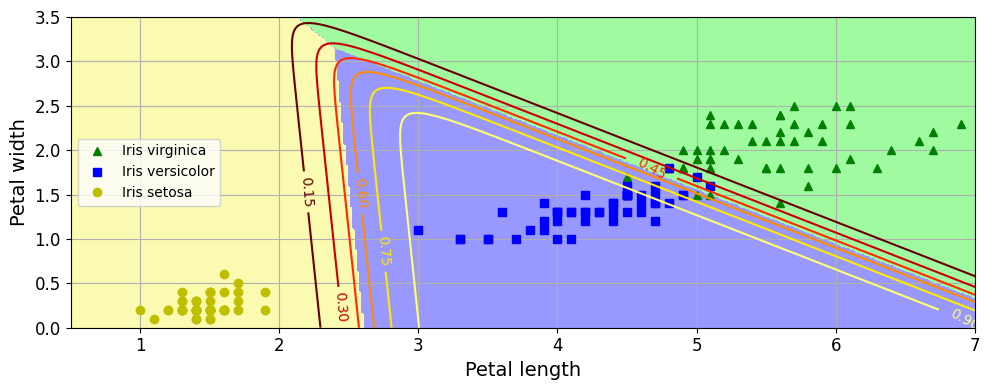

In [65]:
from matplotlib.colors import ListedColormap

# 클래스별 배경색 설정
custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

# 격자 입력값 생성 (꽃잎 길이: 0~8, 너비: 0~3.5)
x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

# 예측 확률과 클래스 예측
y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

# 클래스 1 확률과 예측 클래스 형태 변환 (시각화용)
zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))

# 실제 데이터 점 시각화
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

# 예측 클래스에 따른 배경 영역 표시
plt.contourf(x0, x1, zz, cmap=custom_cmap)

# 클래스 1(Iris versicolor)의 확률 등고선
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)

plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
save_fig("softmax_regression_contour_plot")
plt.show()


위 그림은 모델의 예측 결과에 따른 결정 경계를 보여 줌(배경색으로 표현)

두 클래스 간의 **결정 경계는 선형(linear)**임에 주목

또한 그림에는 Iris versicolor 클래스의 확률도 곡선으로 표현되어 있음  
예: 0.450으로 표시된 선은 versicolor일 확률이 45%인 경계선을 나타냄

*모델은 50% 미만의 확률을 가진 클래스도 예측할 수 있음*

예를 들어, **모든 결정 경계가 만나는 지점에서는 세 클래스가 동일한 확률 (33%)**을 갖게 되며,  
그중 가장 높은 확률을 가진 클래스를 선택하여 예측하게 됨

